In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
pd.set_option("display.precision", 4)

# Plot results

In [41]:
df_n = pd.read_csv('./p_mnist/naive/csv_log*/eval_results.csv')

In [42]:
df_n.head(20)

,eval_exp,training_exp,eval_accuracy,eval_loss,forgetting
0,0,0,0.9821,0.0735,0.0000
1,1,0,0.0864,8.9161,0.0000
2,2,0,0.1387,9.0297,0.0000
3,3,0,0.0860,8.9341,0.0000
4,4,0,0.0823,8.1887,0.0000
5,5,0,0.1005,7.7199,0.0000
6,6,0,0.1238,7.1399,0.0000
7,7,0,0.1004,9.2332,0.0000
8,8,0,0.1179,8.9436,0.0000
9,9,0,0.1029,9.6403,0.0000


In [13]:
def plot_strategy_accuracy(df, title):
    fig = plt.figure(figsize=(8,6))
    for eval_e in df['eval_exp'].unique():
        df_helper = df[df['eval_exp']==eval_e]
        df_helper = df_helper[df_helper['training_exp'] >= df_helper['eval_exp']]
        plt.plot(df_helper['training_exp']+1, df_helper['eval_accuracy'], 'o-', label = eval_e+1)
    plt.legend()
    plt.xlabel('Training experience')
    plt.xticks(ticks = range(1,len(df['eval_exp'].unique())+1))
    plt.ylabel('Accuracy')
    plt.ylim(0,1.0)
    plt.title(title)

In [20]:
def evalutate_experiment(path, subfolders, experiment_name, strategy_names):
    df_evaluation = pd.DataFrame(columns=['CL-Strategy', 'Average Accuracy', 'SD Accuracy', 'Average Forgetting'])
    for index, strategy in enumerate(strategy_names):
        df_helper = pd.read_csv(path + subfolders[index] + '/csv_log*/eval_results.csv')
        last_exp = max(df_helper['training_exp'])
        mean_accuracy = df_helper[df_helper['training_exp']==last_exp]['eval_accuracy'].mean()
        st_accuracy = df_helper[df_helper['training_exp']==last_exp]['eval_accuracy'].std()
        mean_forgetting = df_helper[df_helper['training_exp']==last_exp]['forgetting'].mean()
        new_row = [strategy, mean_accuracy, st_accuracy, mean_forgetting]
        df_evaluation.loc[len(df_evaluation)] = new_row
        plot_strategy_accuracy(df_helper, f'{experiment_name}: {strategy}')
        plt.savefig(f'{path}{subfolders[index]}/{experiment_name.replace(" ", "").lower()}_{subfolders[index]}_accuracy_plot_new.png', dpi = 300)
    return df_evaluation

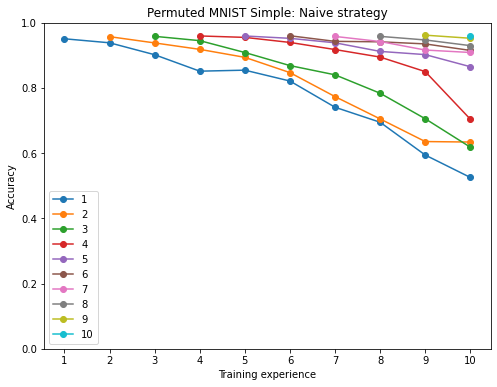

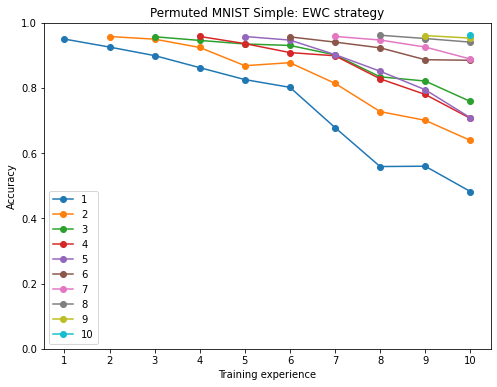

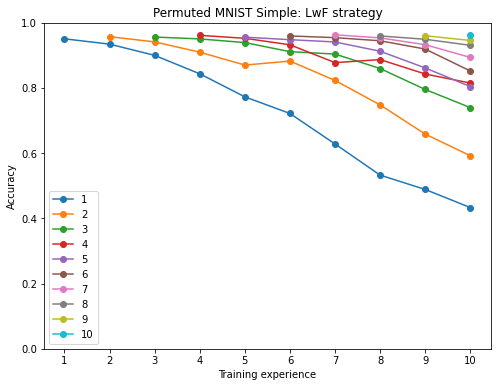

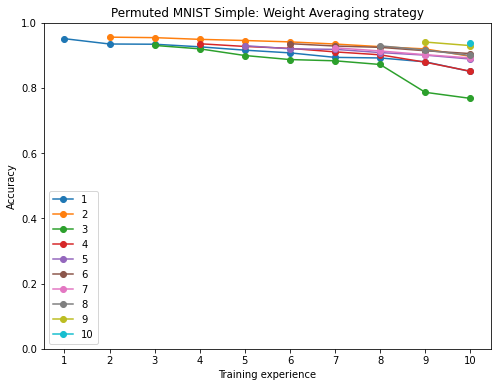

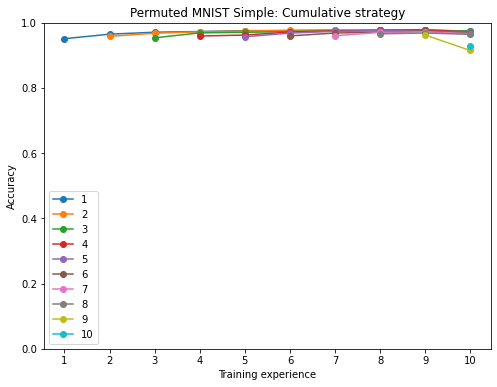

In [21]:
path = './p_mnist_simple/'
subfolders = ['naive', 'ewc', 'lwf', 'wa', 'cumulative']
experiment_name = 'Permuted MNIST Simple'
strategy_names = ['Naive strategy', 'EWC strategy', 'LwF strategy', 'Weight Averaging strategy', 'Cumulative strategy']
df_pmnist_simple = evalutate_experiment(path, subfolders, experiment_name, strategy_names)

In [40]:
df_pmnist_simple

,CL-Strategy,Average Accuracy,SD Accuracy,Average Forgetting
0,Naive strategy,0.8012,0.1633,0.1569
1,EWC strategy,0.7922,0.1595,0.1654
2,LwF strategy,0.7965,0.1690,0.1617
3,Weight Averaging strategy,0.8816,0.0488,0.0549
4,Cumulative strategy,0.9601,0.0210,-0.0048


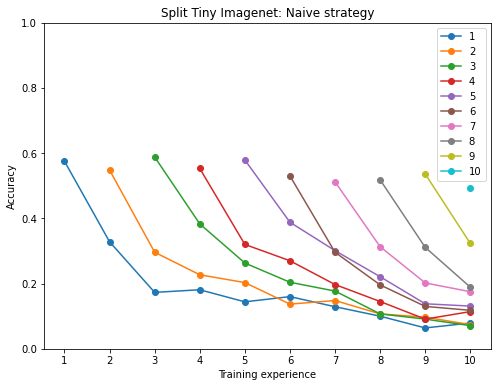

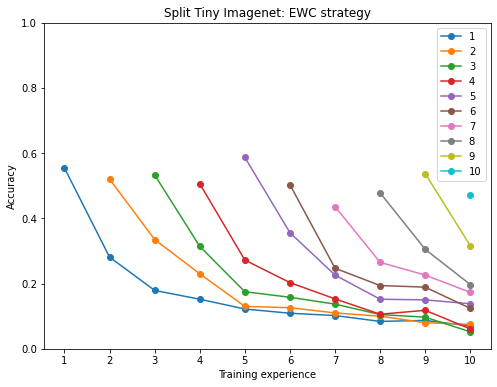

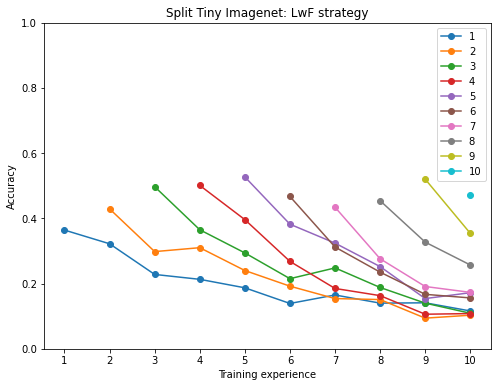

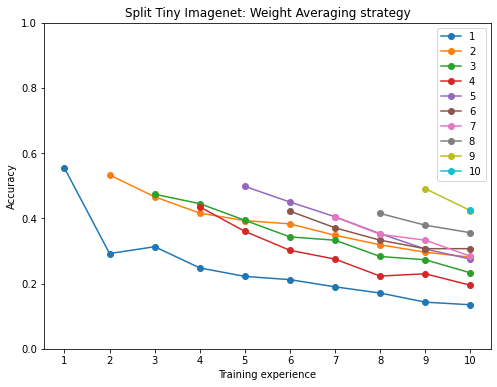

In [30]:
path = './s_tiny_imagenet-update/'
subfolders = ['naive', 'ewc', 'lwf', 'wa']
experiment_name = 'Split Tiny Imagenet'
strategy_names = ['Naive strategy', 'EWC strategy', 'LwF strategy', 'Weight Averaging strategy']
df_sti = evalutate_experiment(path, subfolders, experiment_name, strategy_names)

In [41]:
df_sti

,CL-Strategy,Average Accuracy,SD Accuracy,Average Forgetting
0,Naive strategy,0.1766,0.1340,0.3665
1,EWC strategy,0.1677,0.1336,0.3448
2,LwF strategy,0.2021,0.1239,0.2645
3,Weight Averaging strategy,0.2917,0.0931,0.1736


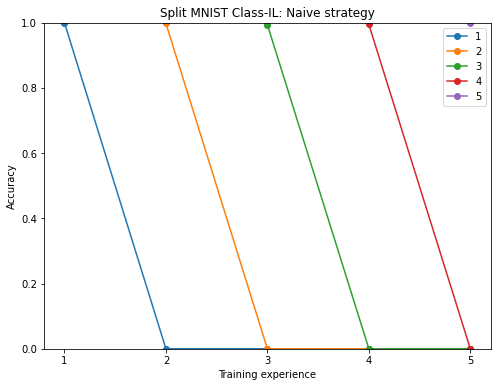

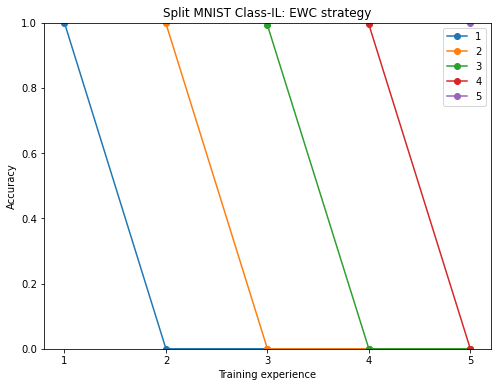

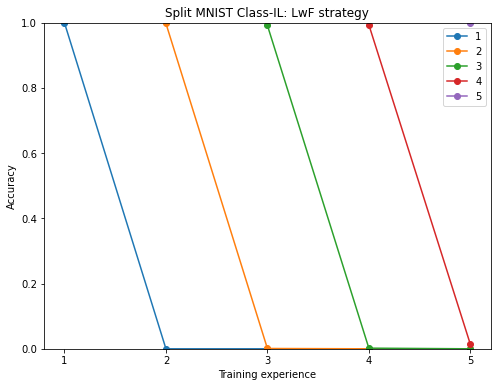

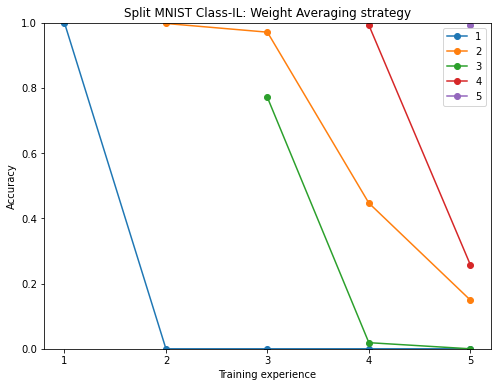

In [44]:
path = './s_mnist-class_incremental/'
subfolders = ['naive', 'ewc', 'lwf', 'wa']
experiment_name = 'Split MNIST Class-IL'
strategy_names = ['Naive strategy', 'EWC strategy', 'LwF strategy', 'Weight Averaging strategy']
df_smnist_class = evalutate_experiment(path, subfolders, experiment_name, strategy_names)

In [45]:
df_smnist_class

,CL-Strategy,Average Accuracy,SD Accuracy,Average Forgetting
0,Naive strategy,0.1995,0.4461,0.7969
1,EWC strategy,0.1995,0.4461,0.7967
2,LwF strategy,0.2024,0.4445,0.7934
3,Weight Averaging strategy,0.2800,0.4129,0.6704


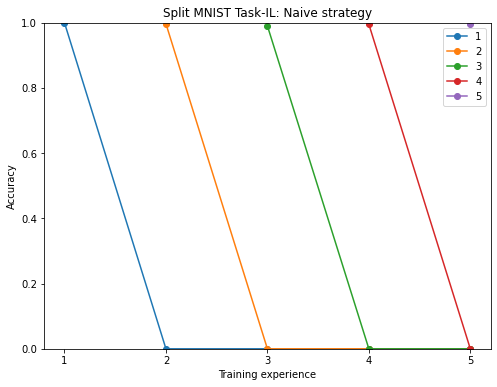

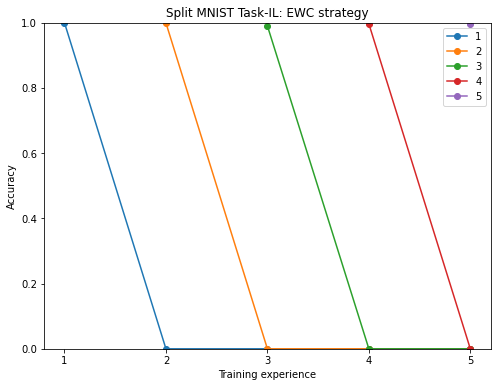

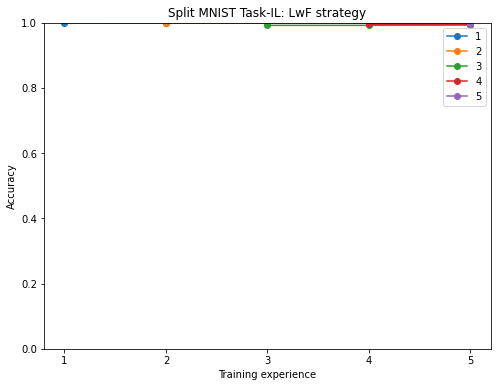

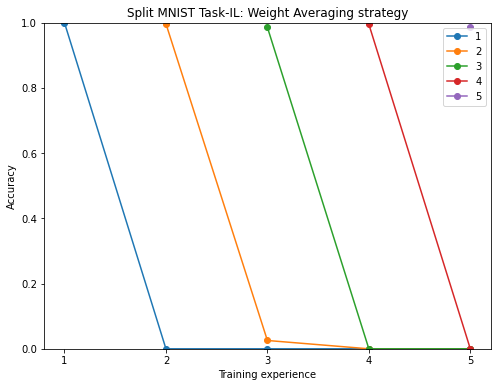

In [35]:
path = './s_mnist-task_incremental/'
subfolders = ['naive', 'ewc', 'lwf', 'wa']
experiment_name = 'Split MNIST Task-IL'
strategy_names = ['Naive strategy', 'EWC strategy', 'LwF strategy', 'Weight Averaging strategy']
df_smnist_task = evalutate_experiment(path, subfolders, experiment_name, strategy_names)

In [43]:
df_smnist_task

,CL-Strategy,Average Accuracy,SD Accuracy,Average Forgetting
0,Naive strategy,0.1993,0.4456,0.7962
1,EWC strategy,0.1994,0.4459,0.7970
2,LwF strategy,0.9962,0.0027,0.0000
3,Weight Averaging strategy,0.1976,0.4418,0.7953
